In [1]:
# Import the ``ansys.dpf.core`` module
from ansys.dpf import core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops

# Define the result file path
result_file_path = examples.find_msup_transient()
# Create the model
model = dpf.Model(data_sources=result_file_path)

In [2]:
# Get a scoping of all time steps available
time_steps = model.metadata.time_freq_support.time_frequencies

In [3]:
# Get the displacement fields (already on nodes) at all time steps
disp_fc = model.results.displacement(time_scoping=time_steps).eval()
print(disp_fc)

DPF  Fields Container
  with 20 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 3 components and 393 entities.
  - field 1 {time:  2} with Nodal location, 3 components and 393 entities.
  - field 2 {time:  3} with Nodal location, 3 components and 393 entities.
  - field 3 {time:  4} with Nodal location, 3 components and 393 entities.
  - field 4 {time:  5} with Nodal location, 3 components and 393 entities.
  - field 5 {time:  6} with Nodal location, 3 components and 393 entities.
  - field 6 {time:  7} with Nodal location, 3 components and 393 entities.
  - field 7 {time:  8} with Nodal location, 3 components and 393 entities.
  - field 8 {time:  9} with Nodal location, 3 components and 393 entities.
  - field 9 {time:  10} with Nodal location, 3 components and 393 entities.
  - field 10 {time:  11} with Nodal location, 3 components and 393 entities.
  - field 11 {time:  12} with Nodal location, 3 components and 393 entities.
  - field 12 {time

In [4]:
# Get the stress fields on nodes at all time steps
# Request the stress on |Nodal| location as the default |ElementalNodal| location is not supported.
stress_fc = model.results.stress.on_location(location=dpf.locations.nodal).on_time_scoping(time_scoping=time_steps).eval()
print(stress_fc)

DPF  Fields Container
  with 20 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  1} with Nodal location, 6 components and 393 entities.
  - field 1 {time:  2} with Nodal location, 6 components and 393 entities.
  - field 2 {time:  3} with Nodal location, 6 components and 393 entities.
  - field 3 {time:  4} with Nodal location, 6 components and 393 entities.
  - field 4 {time:  5} with Nodal location, 6 components and 393 entities.
  - field 5 {time:  6} with Nodal location, 6 components and 393 entities.
  - field 6 {time:  7} with Nodal location, 6 components and 393 entities.
  - field 7 {time:  8} with Nodal location, 6 components and 393 entities.
  - field 8 {time:  9} with Nodal location, 6 components and 393 entities.
  - field 9 {time:  10} with Nodal location, 6 components and 393 entities.
  - field 10 {time:  11} with Nodal location, 6 components and 393 entities.
  - field 11 {time:  12} with Nodal location, 6 components and 393 entities.
  - field 12 {time

Orient the view, then press "a" to produce an animation


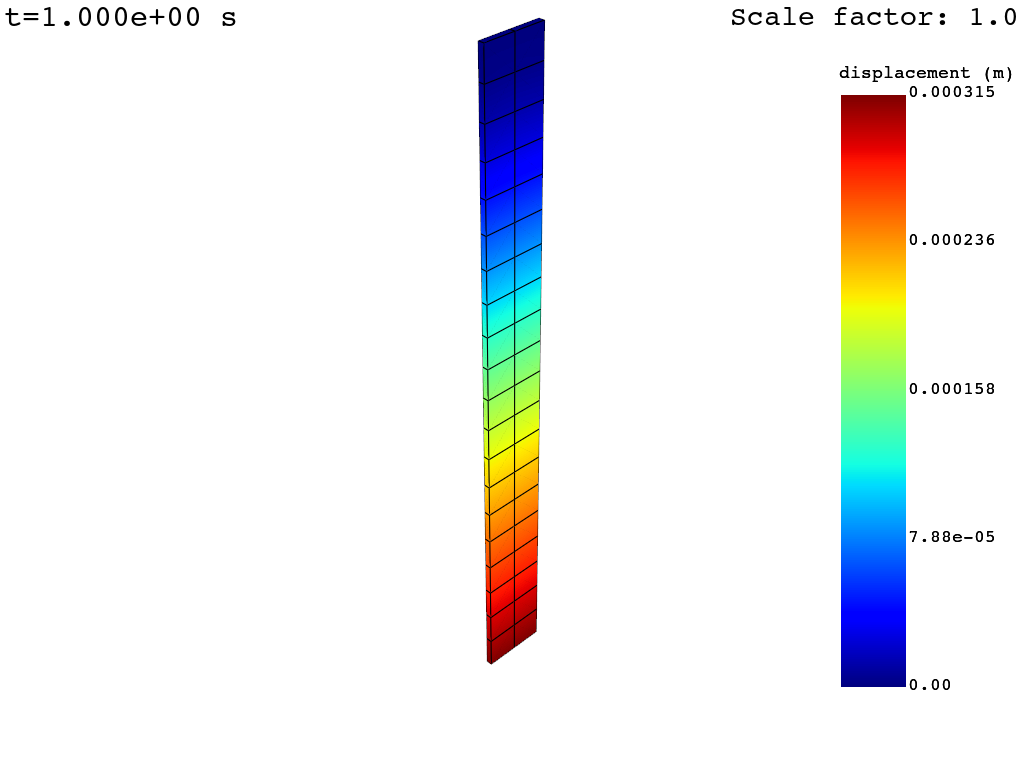

In [5]:
# Animate the displacement results in a deformed geometry
disp_fc.animate()

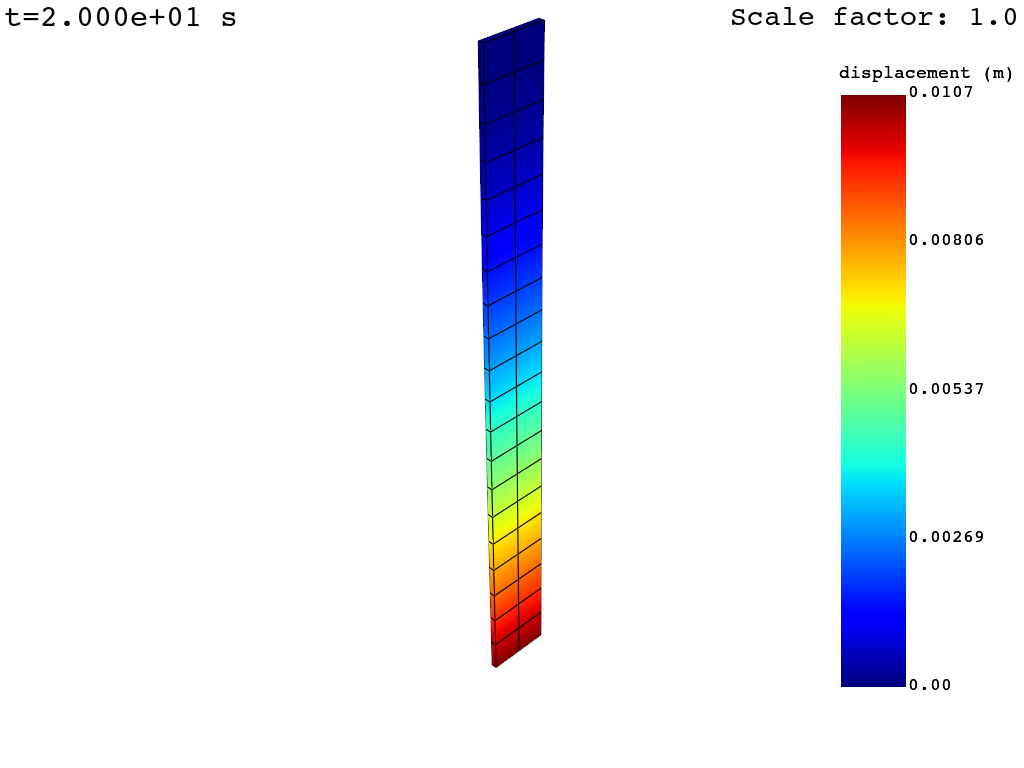

In [6]:
disp_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_disp_1.gif")

Orient the view, then press "a" to produce an animation


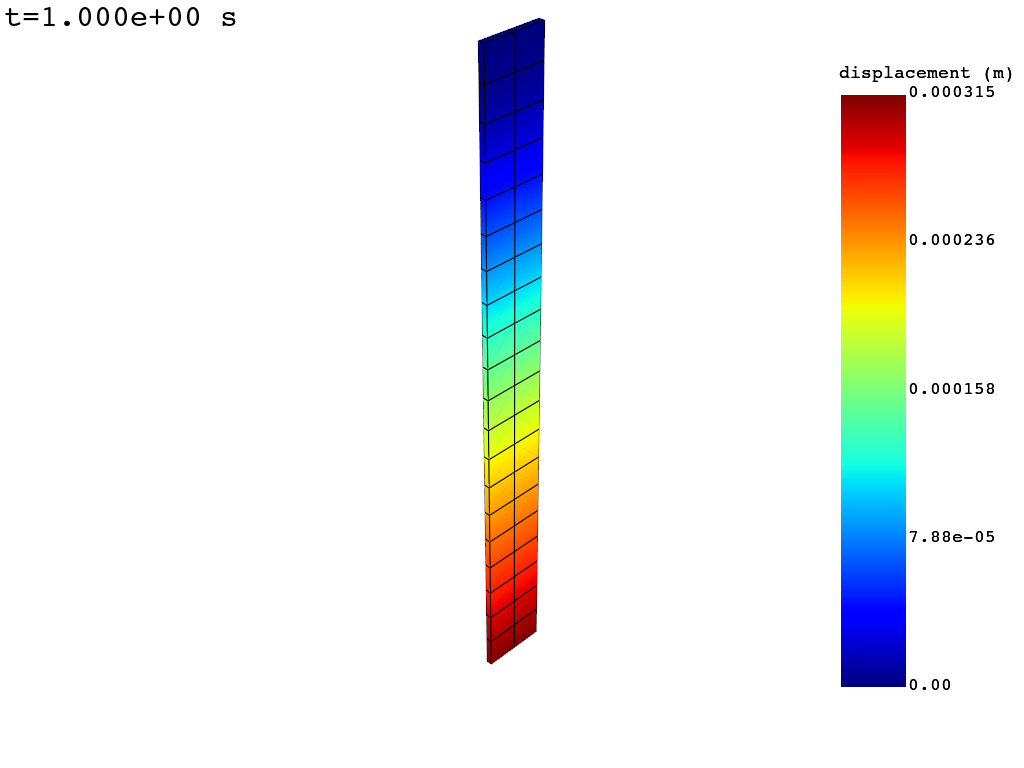

In [7]:
# Animate the displacement results on a static mesh using ``deform_by=False``
disp_fc.animate(deform_by=False)

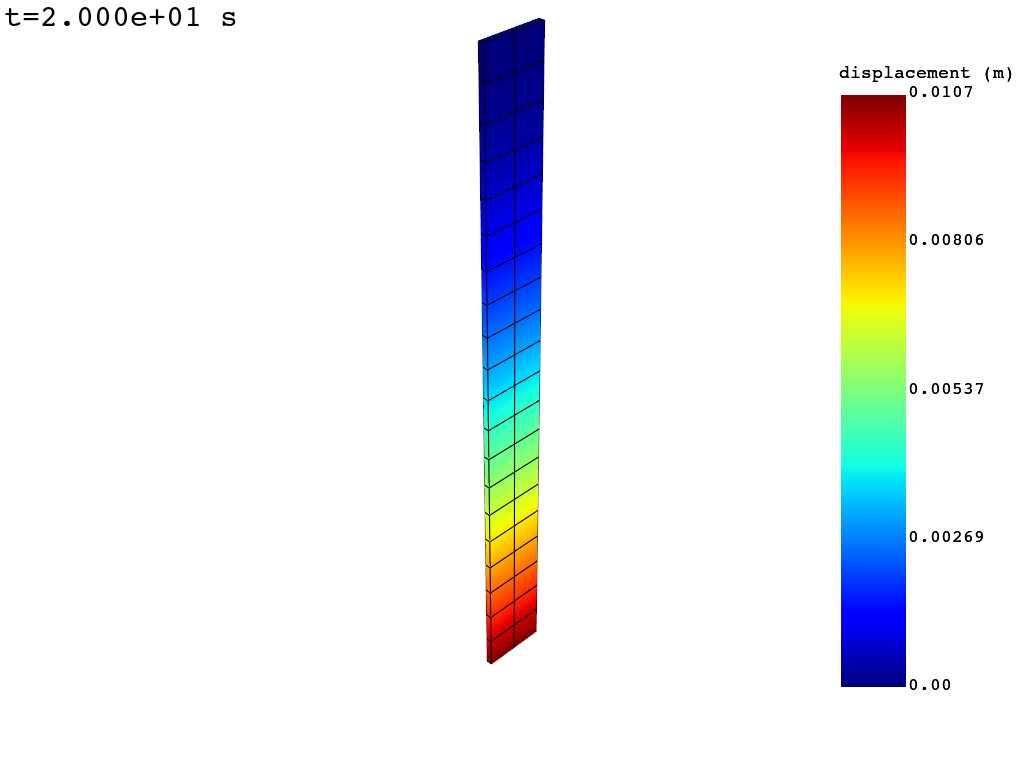

In [8]:
disp_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_disp_2.gif",
                  deform_by=False)

Orient the view, then press "a" to produce an animation


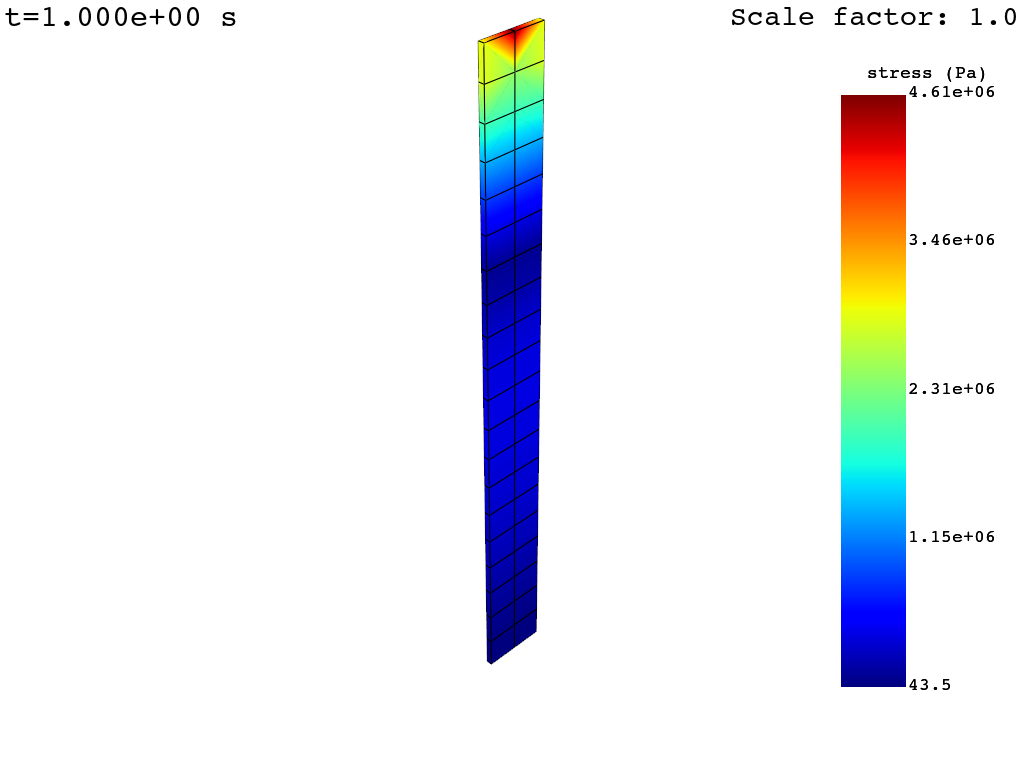

In [9]:
 # Animate the stress results on a deformed mesh
 # Use the ``deform_by`` argument and give the displacement results.
 stress_fc.animate(deform_by=disp_fc)

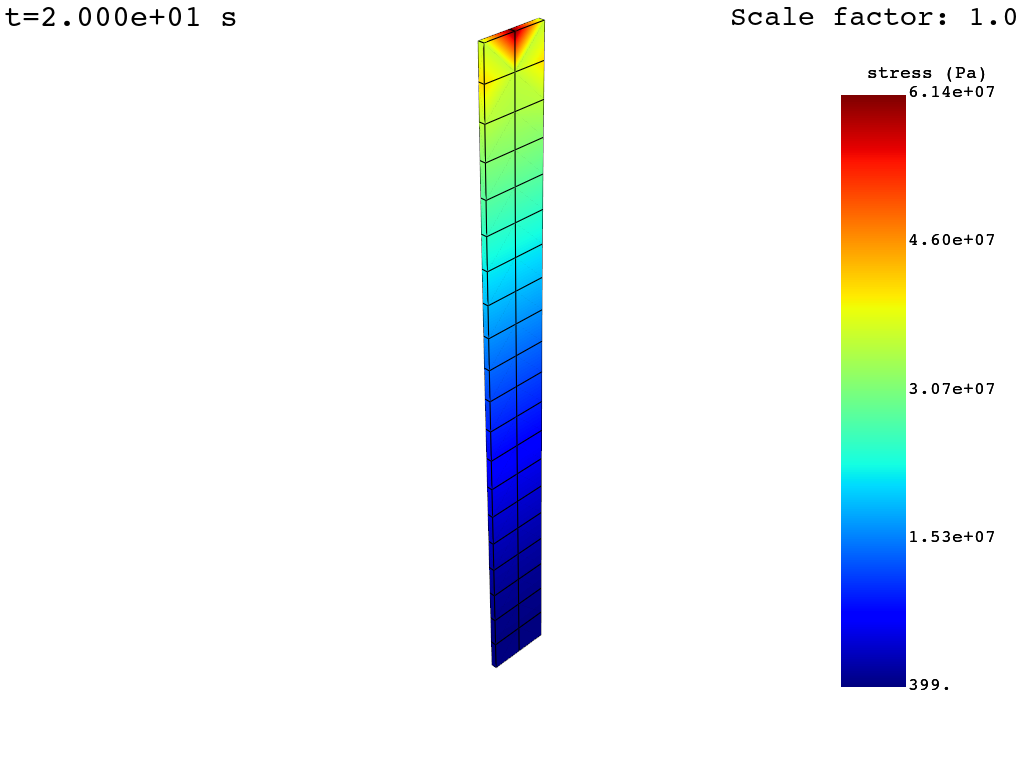

In [10]:
stress_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_stress_1.gif",
                    deform_by=disp_fc)

Orient the view, then press "a" to produce an animation


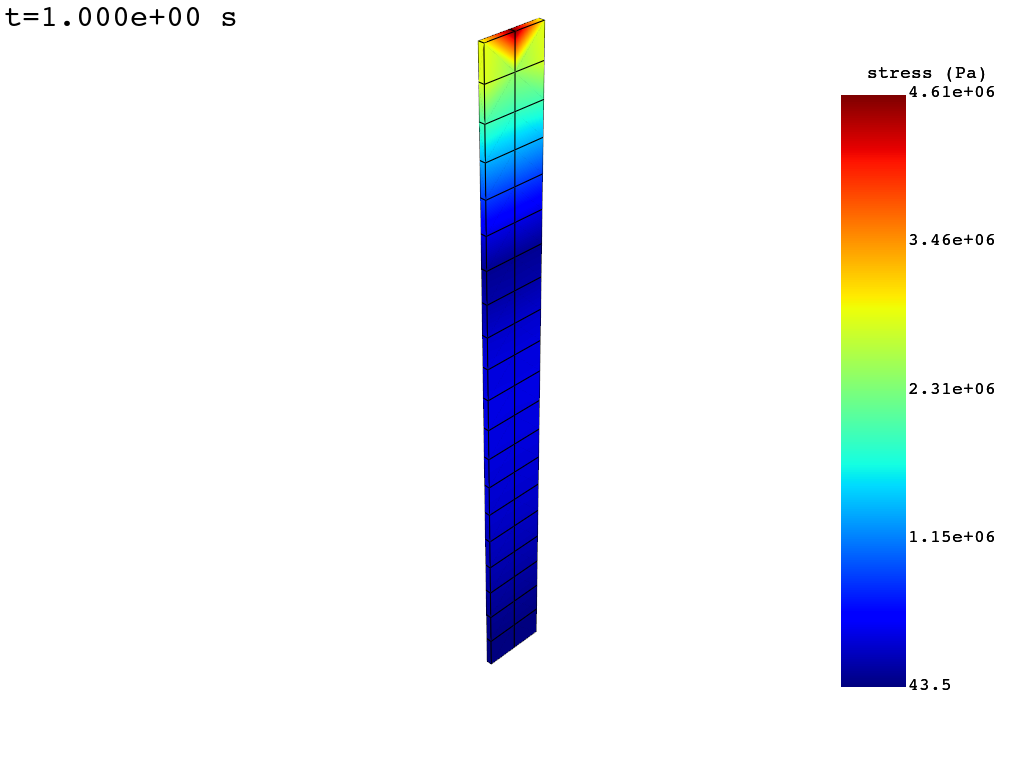

In [11]:
 # Animate the stress results in a static geometry
 stress_fc.animate()

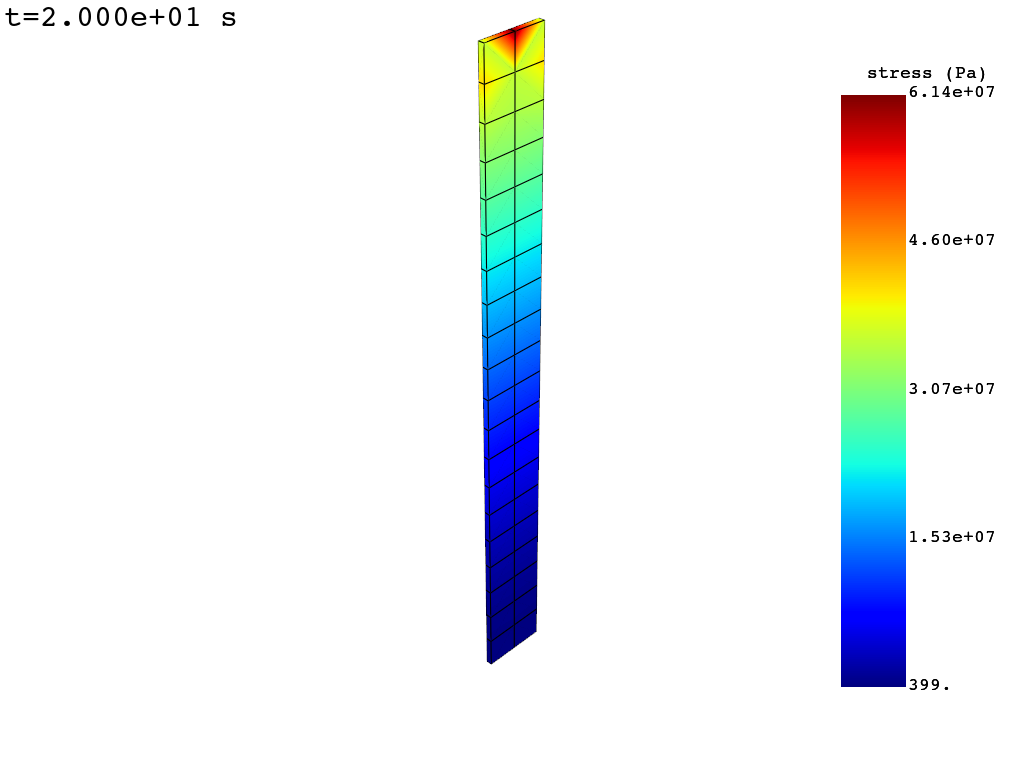

In [12]:
stress_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_stress_2.gif")

Orient the view, then press "a" to produce an animation


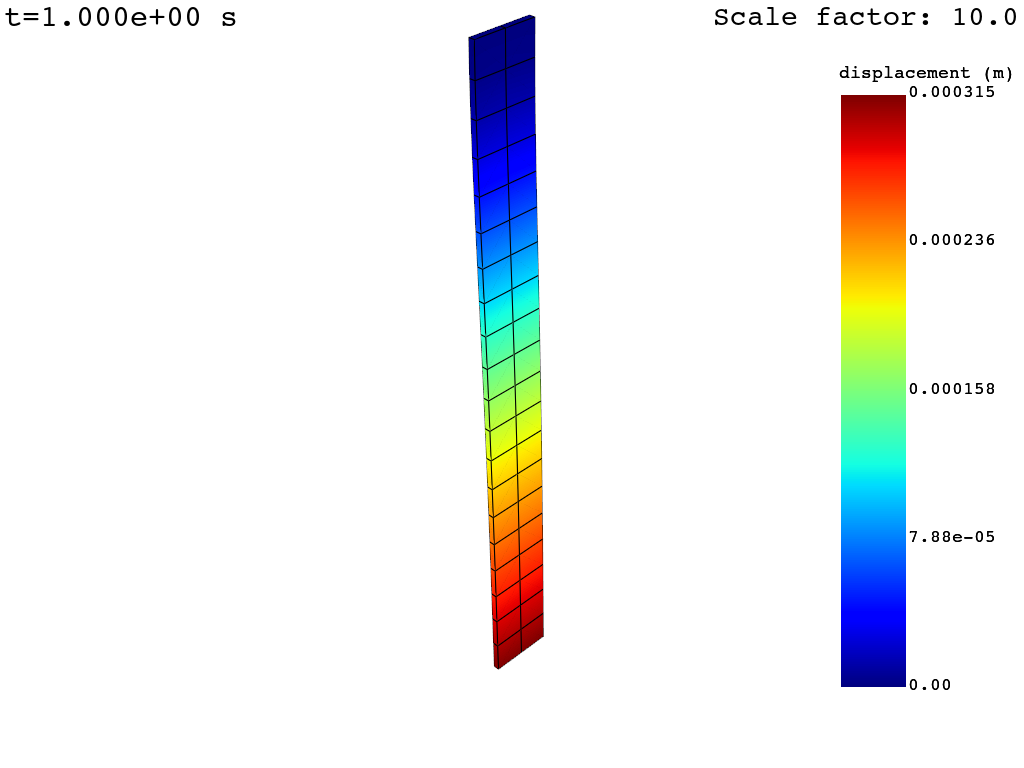

In [13]:
# Define a uniform scale factor
uniform_scale_factor=10.
# Animate the displacements
disp_fc.animate(scale_factor=uniform_scale_factor)

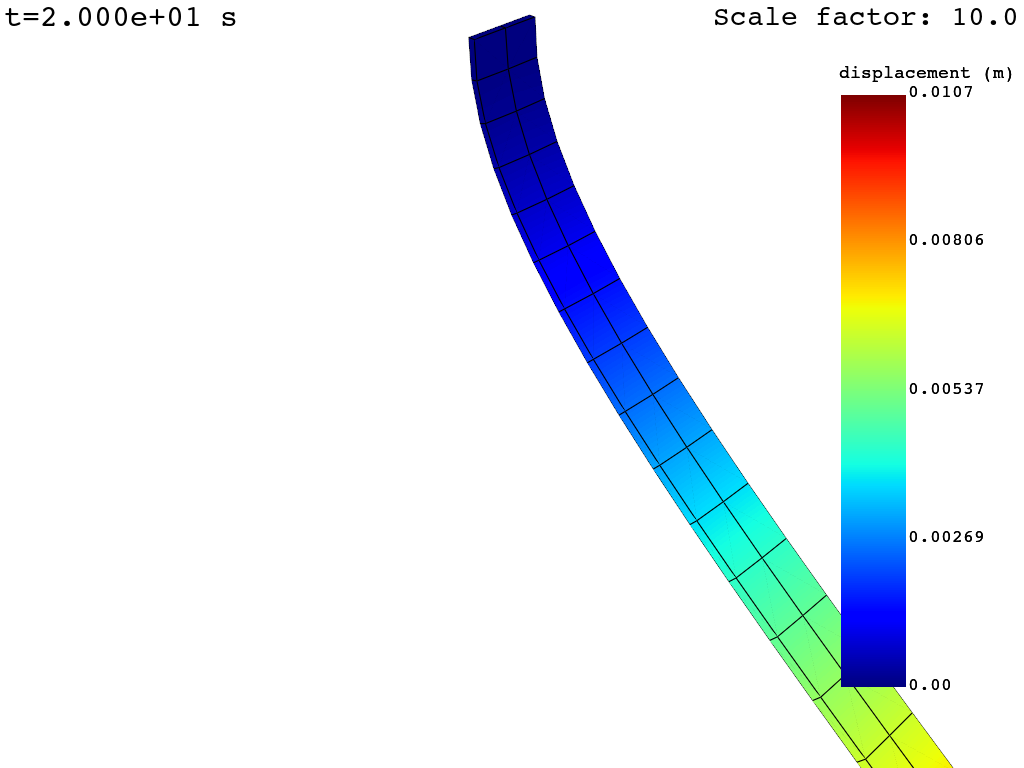

In [14]:
disp_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_disp_3.gif",
                  scale_factor=uniform_scale_factor, text="Uniform scale factor")

Orient the view, then press "a" to produce an animation


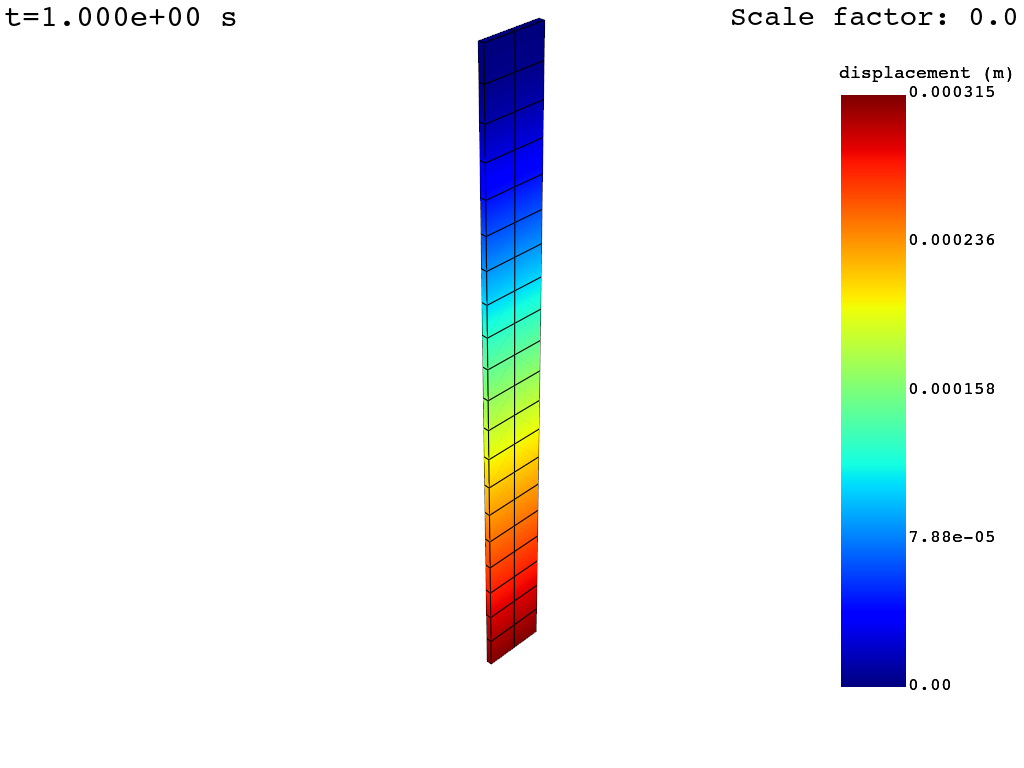

In [15]:
# Define a varying scale factor
varying_scale_factor = [float(i) for i in range(len(disp_fc))]
# Animate the displacements
disp_fc.animate(scale_factor=varying_scale_factor)

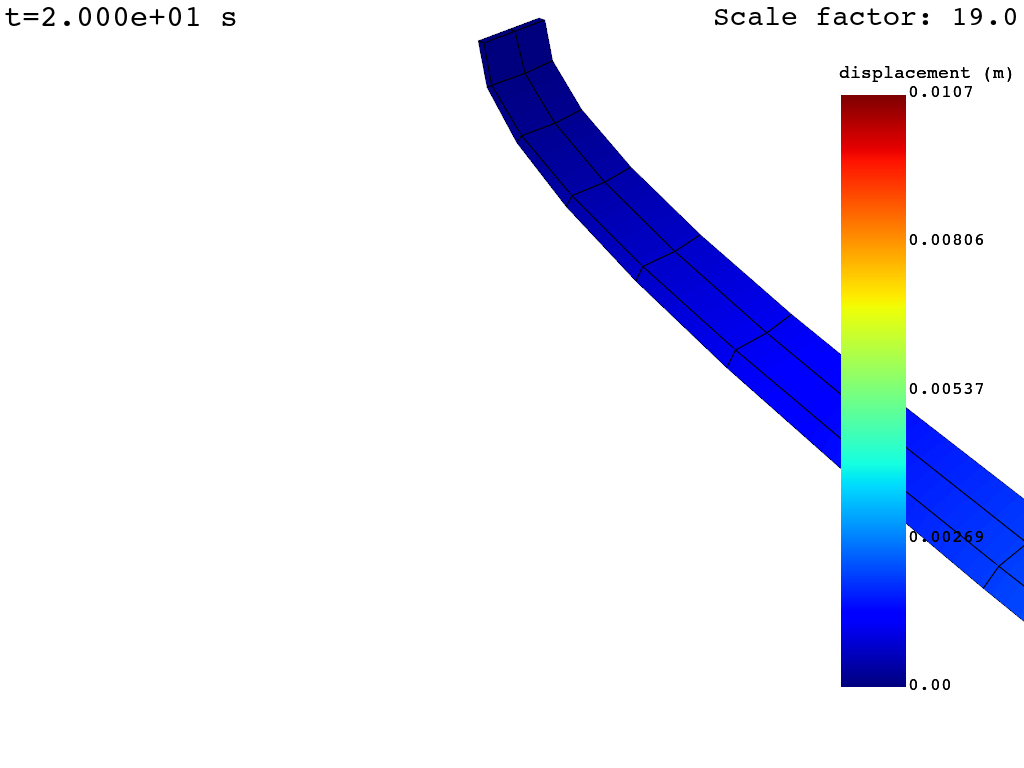

In [16]:
disp_fc.animate(off_screen=True,save_as="doc/source/user_guide/tutorials/animate/animate_disp_4.gif",
                  scale_factor=varying_scale_factor, text="Varying scale factor")

Orient the view, then press "a" to produce an animation


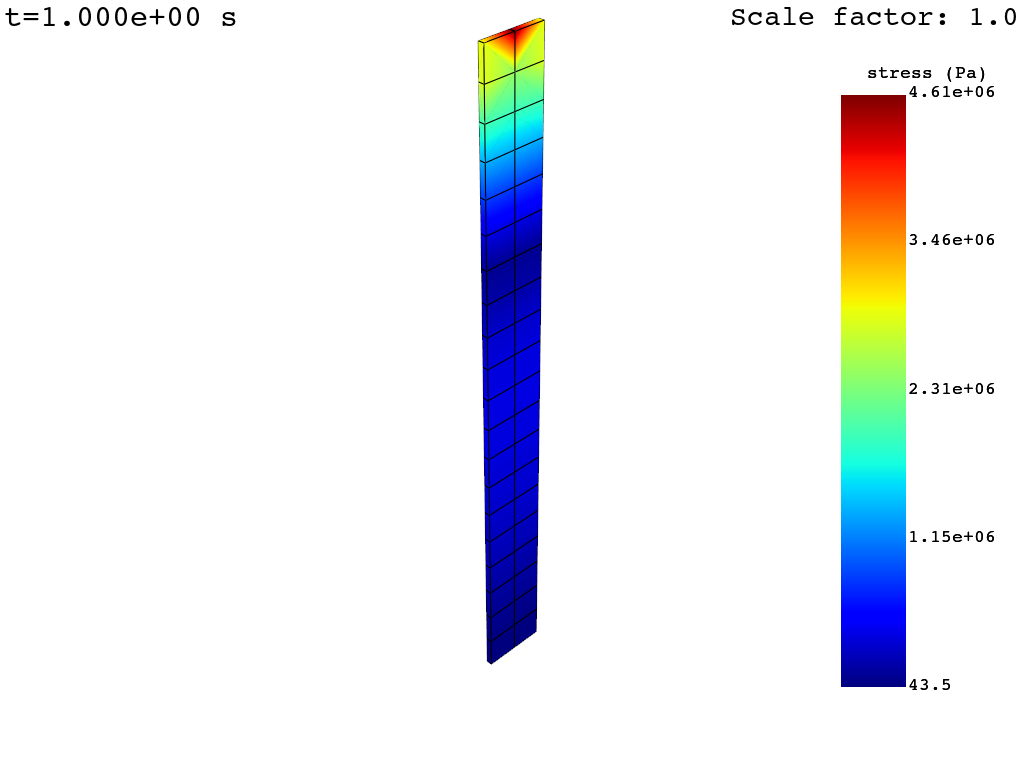

In [17]:
 # Animate the stress results and save it
 stress_fc.animate(deform_by=disp_fc, save_as="animate_stress.gif")

Orient the view, then press "a" to produce an animation


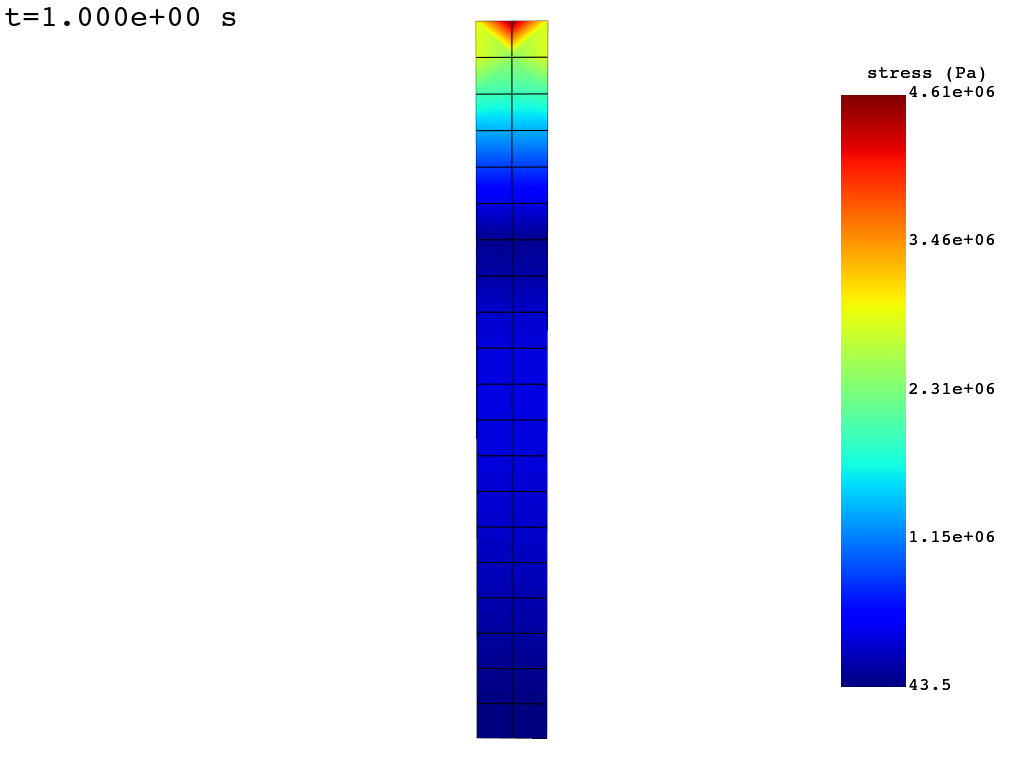

In [18]:
# Define the camera position
cam_pos = [[0., 2.0, 0.6], [0.05, 0.005, 0.5], [0.0, 0.0, 1.0]]
# Animate the stress with a custom fixed camera position
stress_fc.animate(cpos=cam_pos)

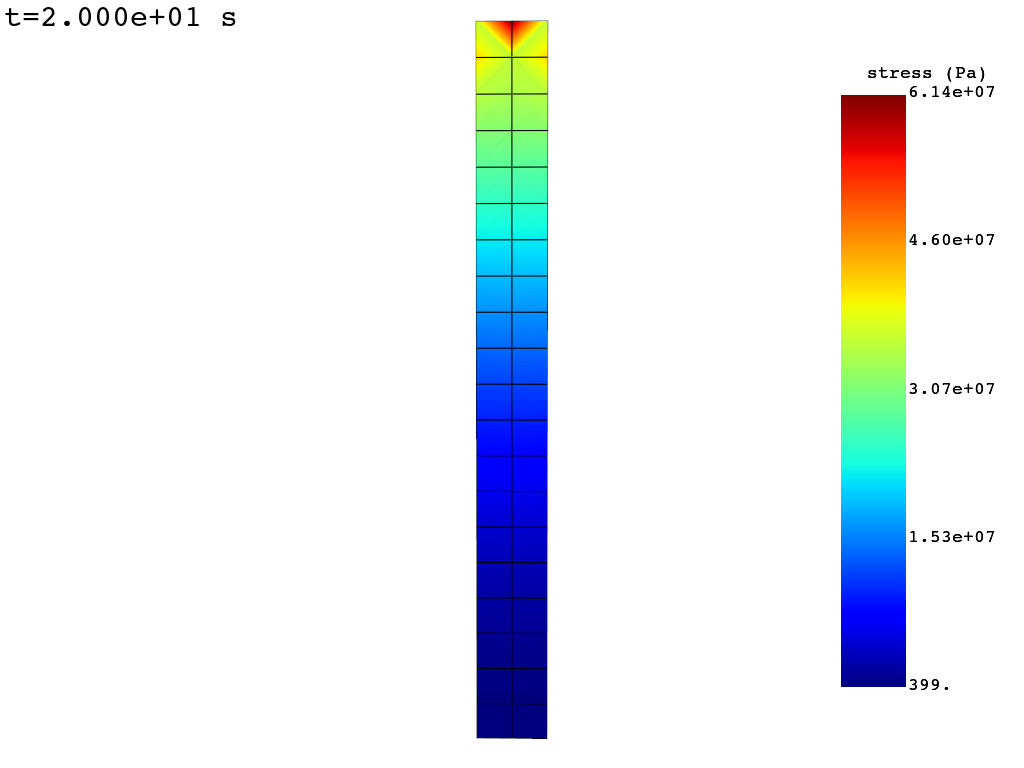

In [19]:
stress_fc.animate(save_as="doc/source/user_guide/tutorials/animate/animate_disp_5.gif",
                    cpos=cam_pos,
                    off_screen=True)

Orient the view, then press "a" to produce an animation


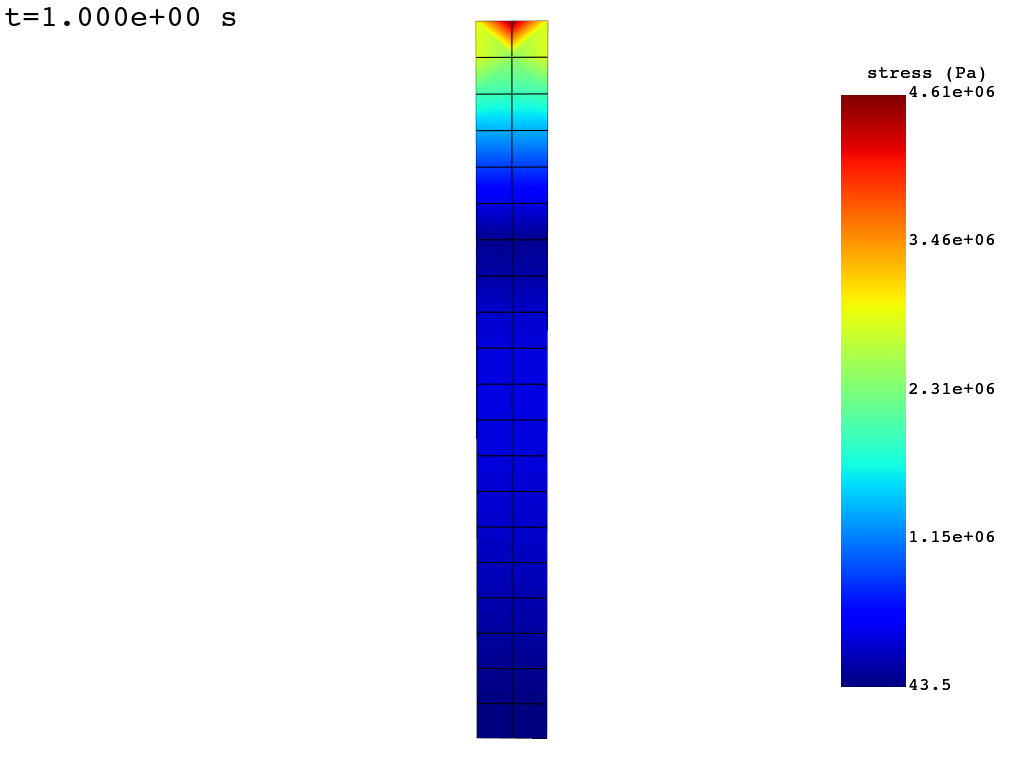

In [20]:
import copy
# Define the list of camera positions
cpos_list = [cam_pos]
# Incrementally increase the x coordinate of the camera by 0.1 for each frame
for i in range(1, len(disp_fc)):
    new_pos = copy.deepcopy(cpos_list[i-1])
    new_pos[0][0] += 0.1
    cpos_list.append(new_pos)

# Animate the stress with a moving camera
stress_fc.animate(cpos=cpos_list)

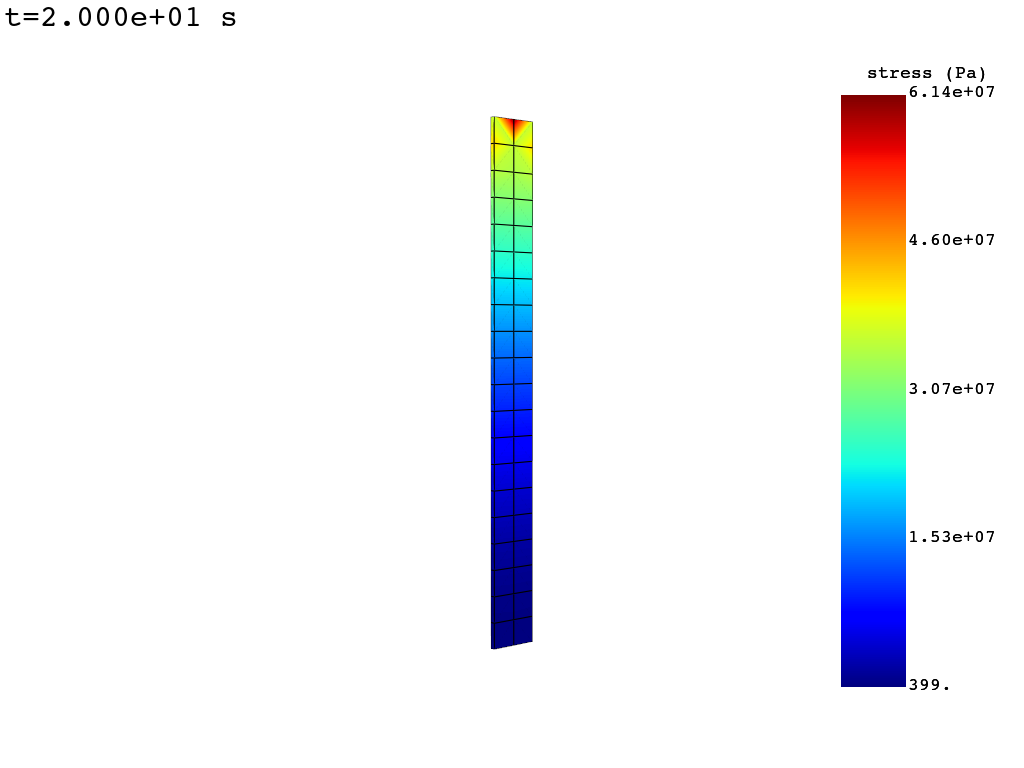

In [21]:
stress_fc.animate(save_as="doc/source/user_guide/tutorials/animate/animate_disp_6.gif",
                    cpos=cpos_list,
                    off_screen=True)